<a href="https://colab.research.google.com/github/alceu-castanheira/Bootcamp-Data-Science-Alura-2020/blob/main/Projeto_M%C3%B3dulo_01_Alceu_Farias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bootcamp de Data Science Aplicado da Alura - Projeto Módulo 01**

## **Análise dos dados de COVID-19 no DF e na região do Entorno**

* **Aluno:** Alceu Bernardes Castanheira de Farias
* **Github:** https://github.com/alceu-castanheira
* **LinkedIn:** https://www.linkedin.com/in/alceu-bernardes-castanheira-de-farias-1002851b4/

### **1) Introdução**

- Olá a todos! Me chamo Alceu, estou iniciando na área de Data Science e como proposta de Projeto para o Módulo 01 do Bootcamp de Data Science Aplicado da Alura, eu resolvei analisar os dados de COVID-19 da região em que moro, o Distrito Federal.




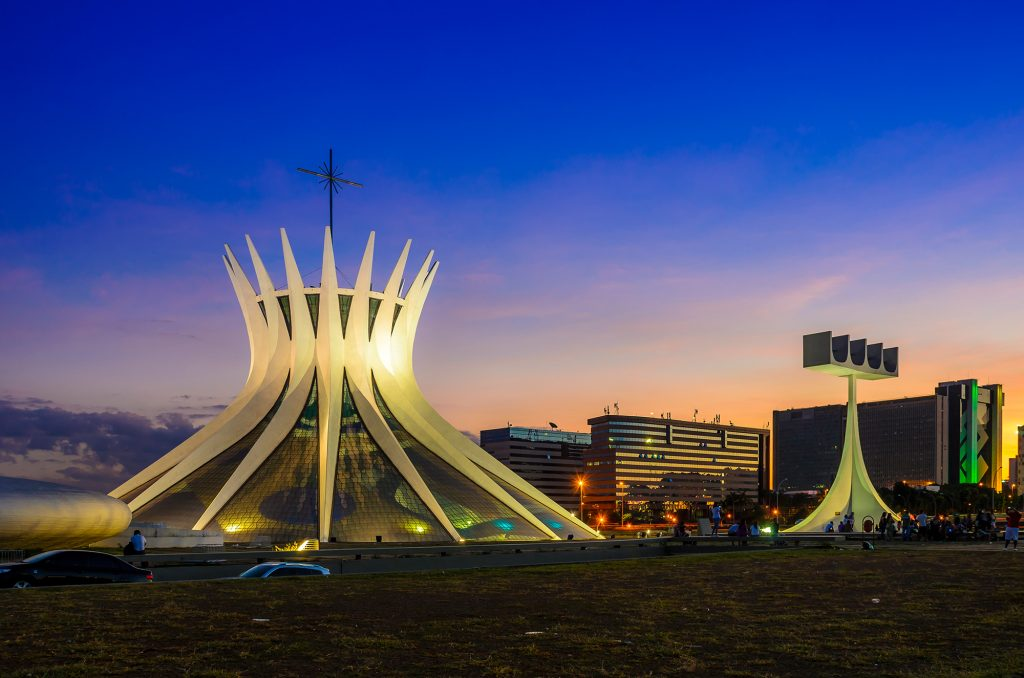

- Uma característica importante relacionada ao DF é de que existem cidades de outros estados que, por estarem mais próximas geograficamente da capital, possuem grande parte da população trabalhando ou usufruindo de serviços de saúde, educação e transporte do DF. 

- Isso ocorre por se encontram mais perto de Brasília do que da capital do estado do qual essas cidades fazem parte, por exemplo. 



- Por conta disso, em 1998, foi criada A **Região Integrada de Desenvolvimento do Distrito Federal e Entorno (RIDE)**, que abrange uma grande quantidade de municípios do Distrito Federal, Goiás e Minas Gerais. Esses municípios integram uma área de planejamento e geração de políticas públicas comuns a eles, a fim de propiciar o desenvolvimento da sua população [1]. 

- Nessa região há municípios com os mais variados graus de desenvolvimento econômico e social e com várias disparidades. Dessa forma, a criação da RIDE, na teoria, supõe uma integração entre esses municípios para que tais disparidades e desigualdades sejam diminuídas ao longo dos anos [1].

- Abaixo, temos uma imagem dos municípios que compõem a RIDE, que foi atualizada pela última vez com a Lei Complementar nº 163, de 14 de junho de 2018.

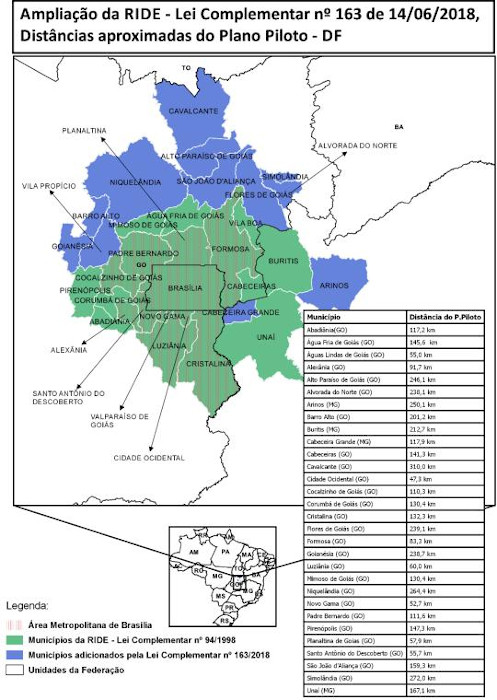

- Por isso, meu objetivo neste Projeto do Módulo 01 é **realizar uma análise dos dados de COVID-19 no DF e nas regiões do Entorno**, comparando ambos para ver se é possível obter alguma relação entre eles.

- Os dados utilizados nesse projeto foram obtidos de um repositório de dados públicos disponibilizados no portal Brasil.IO [2]. A análise leva em consideração dados recolhidos até a data de 21 de novembro de 2020.

- Estaremos trabalhando com a tabela de dados denominada caso.csv, que é um dos datasets disponibilizados no site. Veremos com mais detalhes o que compõem esse dataset na próxima seção deste notebook.

### **2) Importando os dados de COVID-19**

In [1]:
# Importando bibliotecas do Python para serem utilizadas no notebook:
# 
# Pandas => biblioteca de importação e manipulação dos dados
# Matplotlib => Biblioteca para ajustes finos nos gráficos
# Seaborn => Biblioteca de geração de gráficos base do projeto
#
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando os dados do arquivo 'caso.csv' e salvando em um dataframe chamado dados
#
dados = pd.read_csv('caso.csv');

# Exibindo os cinco primeiros dados do dataframe (head)
#
dados.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-21,AC,NaN,state,34435,713,250,True,881935.0,894470.0,12.0,3849.76578,0.0207
1,2020-11-20,AC,NaN,state,34246,711,249,False,881935.0,894470.0,12.0,3828.63595,0.0208
2,2020-11-19,AC,NaN,state,33976,710,248,False,881935.0,894470.0,12.0,3798.45048,0.0209
3,2020-11-18,AC,NaN,state,33725,709,247,False,881935.0,894470.0,12.0,3770.38917,0.0210
4,2020-11-17,AC,NaN,state,33475,709,246,False,881935.0,894470.0,12.0,3742.43966,0.0212


- Aqui podemos verificar que os dados foram importados corretamente e quais as colunas existentes no conjunto de dados com que trabalharemos [3]:

🔍 **search:** passe algum valor para executar a busca por texto completo, que compreende algumas das colunas da tabela.

🔍 **date:** data de coleta dos dados no formato YYYY-MM-DD.

🔍 **state:** sigla da unidade federativa, exemplo: SP.

🔍 **city:** nome do município (pode estar em branco quando o registro é referente ao estado, pode ser preenchido com Importados/Indefinidos também).

🔍 **place_type:** tipo de local que esse registro descreve, pode ser city ou state.

🔍 **order_for_place:** número que identifica a ordem do registro para este local. O registro referente ao primeiro boletim em que esse local aparecer será contabilizado como 1 e os demais boletins incrementarão esse valor.

🔍 **is_last:** campo pré-computado que diz se esse registro é o mais novo para esse local, pode ser True ou False.

🔍 **city_ibge_code:** código IBGE do local.

🔍 **confirmed:** número de casos confirmados.

🔍 **deaths:** número de mortes.

🔍 **estimated_population:** população estimada para esse município/estado em 2020, segundo o IBGE. 

🔍 **estimated_population_2019:** população estimada para esse município/estado em 2019, segundo o IBGE. 
**ATENÇÃO:** essa coluna possui valores desatualizados, prefira usar a coluna estimated_population.

🔍 **confirmed_per_100k_inhabitants:** número de casos confirmados por 100.000 habitantes (baseado em estimated_population).

🔍 **death_rate:** taxa de mortalidade (mortes / confirmados).

- Além das colunas, podemos observar a quantidade de linhas que foram importadas, para saber como quantos dados estão trabalhando no total:

In [2]:
print('No dataset importado de casos de COVID-19 temos um total de {} linhas e {} colunas'.format(dados.shape[0], dados.shape[1]))

No dataset importado de casos de COVID-19 temos um total de 1018071 linhas e 13 colunas


- Portanto, já que temos um grande número de dados, precisamos **filtrar esse dataset para obter somente os dados que nos interessam.**

### **3) Analisando os dados de COVID-19 no Distrito Federal**

* Vamos analisar a quantidade de casos confirmados e de mortes por COVID-19 no Distrito Federal até a data mais recente disponível no nosso conjunto de dados, que foi obtido na data de 21 de novembro de 2020.

- Como vimos na seção anterior, a data mais atual disponível é marcada na coluna 'is_last' com o valor booleano 'True'.

- Logo, se quiremos analisar os dados do Distrito Federal, podemos filtrar a nossa busca (query) no dataset por estado ('state') e pela coluna ('is_last').

In [3]:
# Buscando no dataset os dados do df ('state == "DF"') mais atuais ('is_last == True') por meio de uma query.
# Os dados são salvos no dataframe dados_DF
#
dados_DF = dados.query('state == "DF" & is_last == True')

# Visualizando os 5 primeiros dados do dataset (head)
#
dados_DF.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
21694,2020-11-21,DF,NaN,state,223378,3862,259,True,3015268.0,3055149.0,53.0,7311.52556,0.0173
21953,2020-11-20,DF,Brasília,city,195417,3546,258,True,3015268.0,3055149.0,5300108.0,6396.31651,0.0181
22211,2020-11-20,DF,Importados/Indefinidos,city,27419,311,240,True,NaN,NaN,NaN,NaN,0.0113


- O resultado obtido é interessante porque nos mostra algumas características interessantes sobre o dataset:


**1)** Quando temos na coluna 'city' o valor NaN, parece se tratar dos dados referentes ao estado como um todo, considerando todas suas cidades. Podemos confirmar isso pois o número de casos confirmados e mortes para essa linha (223378 e 3862, respectivamente) é aproximadamente a soma do número de casos confirmados e mortes de Brasília e Importados/Indefinidos (222836 e 3857, respectivamente). 

**2)** Há uma pequena diferença entre a soma anterior e o resultado disponível por conta da data: os dados já incluem a totalização de casos e mortes no DF para o dia 21 de novembro de 2020, mas individualmente temos os dados de Brasília e casos Importados/Indefinidos atualizados somente até o dia 20 de novembro.

**3)** Assim, a diferença de casos confirmados (542) e de mortes (4) corresponde à quantidade de casos confirmados e mortes que ocorreram no Distrito Federal em 21 de novembro de 2020, mas com base no nosso dataset, não é possível analisar quais dados são de Brasília e quais são importados/indefinidos.

**4)** Por isso, o NaN é um valor importante na coluna 'city'. Temos que ter isso em mente para não ignorá-lo ou eliminá-lo do dataset em análises futuras.

- Outra questão interessante é que no Distrito Federal só temos Brasília listada como cidade. Originalmente, Brasilia era composta pelo Plano Piloto (Asa Sul e Asa Norte) e por várias regiões administrativas conhecidas popularmente como cidades satélite. Essas regiões hoje em dia não consideradas cidades, mas sim bairros. Por isso, no dataset, só temos Brasília listada como cidade.


- Isso dificulta a realizar uma análise mais profunda, por exemplo, analisar os dados de COVID-19 por regiões do DF. Portanto, analisamos o Distrito Federal como um todo.

* Vamos analisar os dados até o dia 20 de novembro para poder avaliar a quantidade de casos/mortes que são importados/indefinidos em comparação com os dados originários de Brasília.

In [4]:
print('O número de casos confirmados de COVID-19 em Brasília até o dia 20/11/20 é de: {}'.format(dados_DF.iloc[1]['confirmed']))
print('O número de casos confirmados de COVID-19 Importados/Indefinidos no DF até o dia 20/11/20 é de: {}'.format(dados_DF.iloc[2]['confirmed']))
print('O número total de casos confirmados de COVID-19 no DF até o dia 20/11/20 é de: {}'.format(dados_DF.iloc[1]['confirmed'] + dados_DF.iloc[2]['confirmed']))

O número de casos confirmados de COVID-19 em Brasília até o dia 20/11/20 é de: 195417
O número de casos confirmados de COVID-19 Importados/Indefinidos no DF até o dia 20/11/20 é de: 27419
O número total de casos confirmados de COVID-19 no DF até o dia 20/11/20 é de: 222836


In [5]:
print('O número de mortes por COVID-19 em Brasília até o dia 20/11/20 é de: {}'.format(dados_DF.iloc[1]['deaths']))
print('O número de mortes por COVID-19 de casos Importados/Indefinidos no DF até o dia 20/11/20 é de: {}'.format(dados_DF.iloc[2]['deaths']))
print('O número total de mortes COVID-19 no DF até o dia 20/11/20 é de: {}'.format(dados_DF.iloc[1]['deaths'] + dados_DF.iloc[2]['deaths']))

O número de mortes por COVID-19 em Brasília até o dia 20/11/20 é de: 3546
O número de mortes por COVID-19 de casos Importados/Indefinidos no DF até o dia 20/11/20 é de: 311
O número total de mortes COVID-19 no DF até o dia 20/11/20 é de: 3857


* Podemos visualizar a porcentagem dessas informações por meio de gráficos de pizza. Ok, ok, sabemos que não é o tipo de gráfico mais aconselhado, mas para esse tipo de situação em que temos duas categorias (Dados de Brasília e Importados/Indefinidos), o gráfico funciona melhor.

Text(0.5, 1.0, 'Porcentagem de casos confirmados de COVID-19 em originários em Brasília ou Importados/Indefinidos até 20/11/2020')

<Figure size 1440x1440 with 0 Axes>

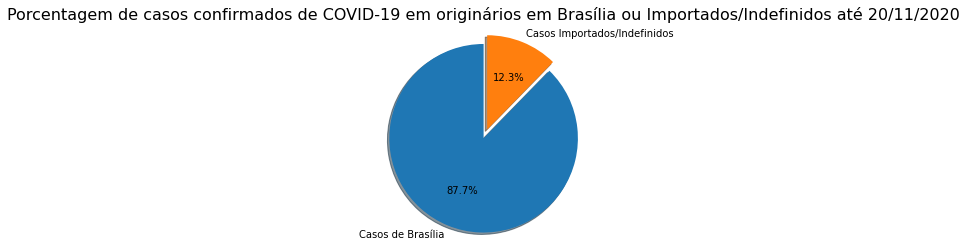

In [6]:
# Gráfico realizado com base em: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py
#
# Definindo o tamanho da figura 
#
plt.figure(figsize=(20,20))

# Labels do gráfico, ordenados no sentido anti-horário:
#
labels = 'Casos de Brasília', 'Casos Importados/Indefinidos'

# Quantitaivo de cada label 
#
sizes = [195417, 27419]

# Explodir a segunda fatia do gráfico, para criar um pequeno 3D
#
explode = (0, 0.1)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
#
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Garantir que o gráfico será desenhado como um círculo
#
ax1.axis('equal')  

# Adicionando título ao gráfico
#
plt.title('Porcentagem de casos confirmados de COVID-19 em originários em Brasília ou Importados/Indefinidos até 20/11/2020', fontsize=16)

Text(0.5, 1.0, 'Porcentagem de mortes por COVID-19 originárias de Brasília ou Importdadas/Indefinidas até 20/11/2020')

<Figure size 1440x1440 with 0 Axes>

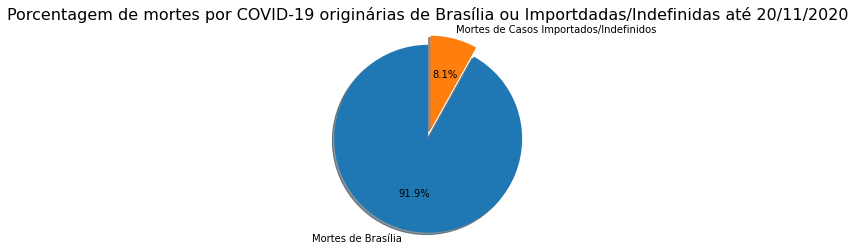

In [7]:
# Tamanho da figura
#
plt.figure(figsize=(20,20))

labels = 'Mortes de Brasília', 'Mortes de Casos Importados/Indefinidos'

# Quantitaivo de cada label
#
sizes = [3546, 311]

# Explodir a segunda fatia do gráfico, para criar um pequeno 3D
#
explode = (0, 0.1)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
#
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Garantir que o gráfico será desenhado como um círculo
#
ax1.axis('equal')  

# Adicionando título ao gráfico
#
plt.title('Porcentagem de mortes por COVID-19 originárias de Brasília ou Importdadas/Indefinidas até 20/11/2020', fontsize=16)

# Exibindo o gráfico
#
#plt.show()

* Ou seja, temos aproximadamente **12.3% de casos importados/indefinidos no DF e um total de 8.1% de mortes de pacientes que não residem no DF**.

* Esse número/porcentagem é grande comparado aos valores de outros estados? Vamos comparar.

### **4) Analisando os dados de COVID-19 em Goiás**

- Como vimos anteriormente, a região do Entorno contém cidades pertencentes ao estado de Goiás e ao estado de Minas Gerais. Por isso, vamos começar analisar rapidamente o número de casos de COVID-19 em Goiás, passando posteriormente para Minas Gerais

* Vamos buscar os dados mais recentes de COVID-19 referentes ao estado de Goiás no nosso dataset, de maneira análoga a como procedemos com o DF:

In [8]:
dados_GO = dados.query('state == "GO" & is_last == True')
dados_GO.head(5)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
190344,2020-11-21,GO,NaN,state,273234,6244,255,True,7018354.0,7113540.0,52.0,3841.04117,0.0229
190599,2020-11-19,GO,Abadia de Goiás,city,690,7,183,True,8773.0,8958.0,5200050.0,7702.61219,0.0101
190782,2020-11-19,GO,Abadiânia,city,176,12,175,True,20042.0,20461.0,5200100.0,860.17301,0.0682
190957,2020-11-19,GO,Acreúna,city,1003,25,172,True,22366.0,22546.0,5200134.0,4448.68269,0.0249
191129,2020-11-19,GO,Adelândia,city,87,2,168,True,2516.0,2516.0,5200159.0,3457.86963,0.0230


* Aqui vemos a diferença do dataframe dados_GO em relação ao dataframe dados_DF, pois temos várias cidades em Goiás:

In [9]:
print('O número de cidades no estado de GO listada no nosso conjunto de dados é de: {}'.format(dados_GO.shape[0]-2))

O número de cidades no estado de GO listada no nosso conjunto de dados é de: 246


* No resultado acima retiramos 2 linhas, que são referente aos estado como um todo ('city = NaN') e os casos Importados/Indefinidos.

* Agora podemmos analisar os dados de casos confirmados e mortes no estado de Goiás e comparar com os dados do Distrito Federal. Para isso, utilizamos a primeira linha dos dataframes, que contem dados de todas as cidades ('city = NaN'):

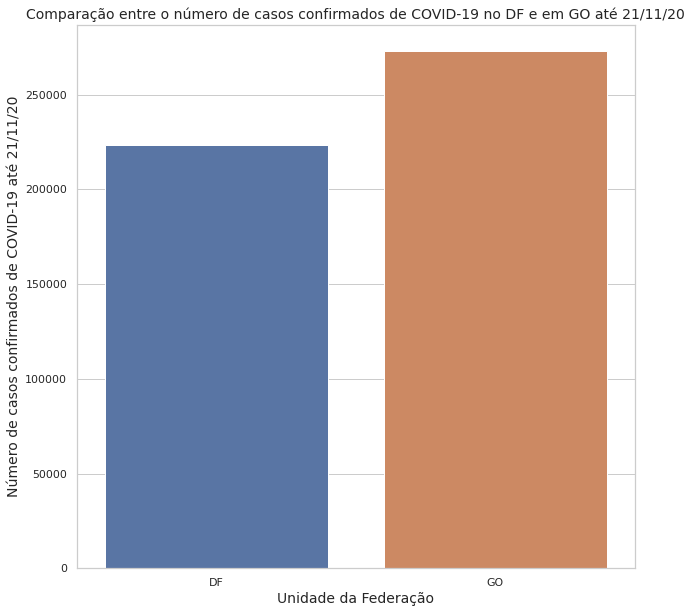

In [10]:
casos_DF = dados_DF.iloc[0]['confirmed']
mortes_DF = dados_DF.iloc[0]['deaths']

casos_GO = dados_GO.iloc[0]['confirmed']
mortes_GO = dados_GO.iloc[0]['deaths']

casos = [casos_DF, casos_GO]
mortes = [mortes_DF, mortes_GO]

plt.figure(figsize=(10,10))
sns.set_theme(style="whitegrid")
sns.barplot(x=['DF', 'GO'], y = casos)
plt.xlabel('Unidade da Federação',fontsize=14)
plt.ylabel('Número de casos confirmados de COVID-19 até 21/11/20',fontsize=14)
plt.title('Comparação entre o número de casos confirmados de COVID-19 no DF e em GO até 21/11/20', fontsize=14)
plt.show()

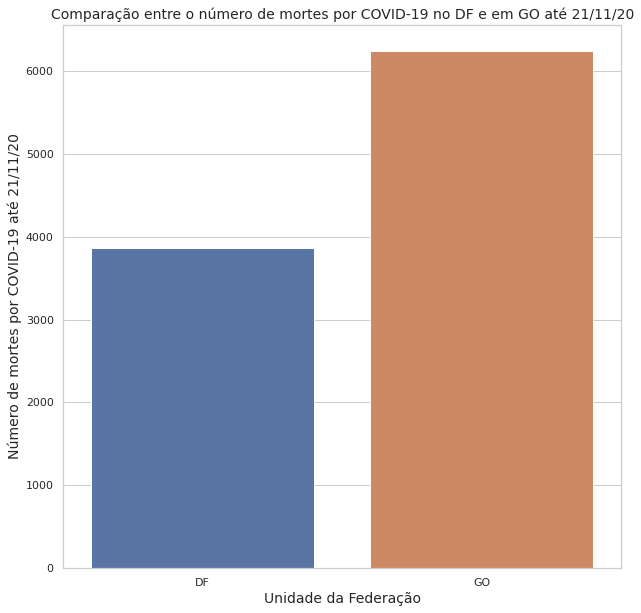

In [11]:
plt.figure(figsize=(10,10))
sns.set_theme(style="whitegrid")
sns.barplot(x=['DF', 'GO'], y = mortes)
plt.xlabel('Unidade da Federação',fontsize=14)
plt.ylabel('Número de mortes por COVID-19 até 21/11/20',fontsize=14)
plt.title('Comparação entre o número de mortes por COVID-19 no DF e em GO até 21/11/20', fontsize=14)
plt.show()

In [12]:
print('A diferença de casos confirmados de COVID-19 entre GO e DF até o dia 21/11/20 é de: {}'.format(dados_GO.iloc[0]['confirmed'] - dados_DF.iloc[0]['confirmed']))
print('A diferença de mortes por COVID-19 entre GO e DF até o dia 21/11/20 é de: {}'.format(dados_GO.iloc[0]['deaths'] - dados_DF.iloc[0]['deaths']))

A diferença de casos confirmados de COVID-19 entre GO e DF até o dia 21/11/20 é de: 49856
A diferença de mortes por COVID-19 entre GO e DF até o dia 21/11/20 é de: 2382


In [13]:
print('O estado de GO possui {:.2f} vezes mais casos confirmados de COVID-19 do que o DF'.format(dados_GO.iloc[0]['confirmed']/dados_DF.iloc[0]['confirmed']))
print('O estado de GO possui {:.2f} vezes mais mortes COVID-19 do que o DF'.format(dados_GO.iloc[0]['deaths']/dados_DF.iloc[0]['deaths']))

O estado de GO possui 1.22 vezes mais casos confirmados de COVID-19 do que o DF
O estado de GO possui 1.62 vezes mais mortes COVID-19 do que o DF


* Esses dados mostram uma rápida comparação entre DF e GO, de forma que temos cerca de **1.22 vezes mais casos de COVID-19 em GO do que no DF, além de 1.62 vezes mais mortes em GO**.


* Entretanto, é importante analisar que GO é um estado mais populoso do que o DF. De fato:


In [14]:
print('A população do estado de GO é de {} habitantes.'.format(dados_GO.iloc[0]['estimated_population']))
print('A população do DF é de {} habitantes.'.format(dados_DF.iloc[0]['estimated_population']))
print('O número casos confirmados de COVID-19 por 100 mil habitantes em GO é: {:.2f}'.format(dados_GO.iloc[0]['confirmed_per_100k_inhabitants']))
print('O número casos confirmados de COVID-19 por 100 mil habitantes no DF é: {:.2f}'.format(dados_DF.iloc[0]['confirmed_per_100k_inhabitants']))
print('Analisando o número de casos por 100 mil habitantes, a taxa no DF é {:.2f} vezes maior que em GO.'.format(dados_DF.iloc[0]['confirmed_per_100k_inhabitants']/dados_GO.iloc[0]['confirmed_per_100k_inhabitants']))

A população do estado de GO é de 7113540.0 habitantes.
A população do DF é de 3055149.0 habitantes.
O número casos confirmados de COVID-19 por 100 mil habitantes em GO é: 3841.04
O número casos confirmados de COVID-19 por 100 mil habitantes no DF é: 7311.53
Analisando o número de casos por 100 mil habitantes, a taxa no DF é 1.90 vezes maior que em GO.


* Ou seja, **ainda que no total haja mais casos confirmados de COVID-19 em Goiás, o número de casos confirmados por 100 mil no DF é quase o dobro do que em GO (1.9 vezes maior).**

* Vamos então, analisar os casos importados/indefinidos de COVID-19 em GO:

In [15]:
dados_GO.query('city == "Importados/Indefinidos"')

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
209563,2020-11-19,GO,Importados/Indefinidos,city,0,0,242,True,NaN,NaN,NaN,NaN,0.0


* Em Goiás, não temos casos importados/indefinidos, ou seja, **todos os casos confirmados de COVID-19 até 19 de novembro de 2020 no estado de Goiás são originários do estado.**

###**5) Analisando os dados de COVID-19 em Minas Gerais**

* Vamos agora analisar o estado de Minas Gerais, pois temos 4 cidades do Entorno que pertencem a este estado.

* Vamos fazer a mesma busca que fizemos para DF e GO:

In [16]:
dados_MG = dados.query('state == "MG" & is_last == True')
dados_MG.head(5)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
363204,2020-11-21,MG,NaN,state,395534,9732,257,True,21168791.0,21292666.0,31.0,1857.60675,0.0246
363461,2020-11-20,MG,Abadia dos Dourados,city,104,1,179,True,6989.0,7006.0,3100104.0,1484.44191,0.0096
363640,2020-11-20,MG,Abaeté,city,94,3,205,True,23237.0,23250.0,3100203.0,404.30108,0.0319
363845,2020-11-20,MG,Abre Campo,city,115,1,148,True,13454.0,13444.0,3100302.0,855.40018,0.0087
363993,2020-11-20,MG,Acaiaca,city,63,2,138,True,3994.0,3994.0,3100401.0,1577.36605,0.0317


In [17]:
print('O número de cidades no estado de MG listadas no nosso conjunto de dados é de: {}'.format(dados_MG.shape[0]-2))

O número de cidades no estado de MG listadas no nosso conjunto de dados é de: 852


* Mais uma vez, retiramos duas das linhas totais do dataframe dados_MG, que correspondem às estatísticas do estado como um todo e aos casos importados/indefinidos.

* Vamos comparar o número de casos confirmados e mortes por COVID-19 no estado de MG com DF e GO:

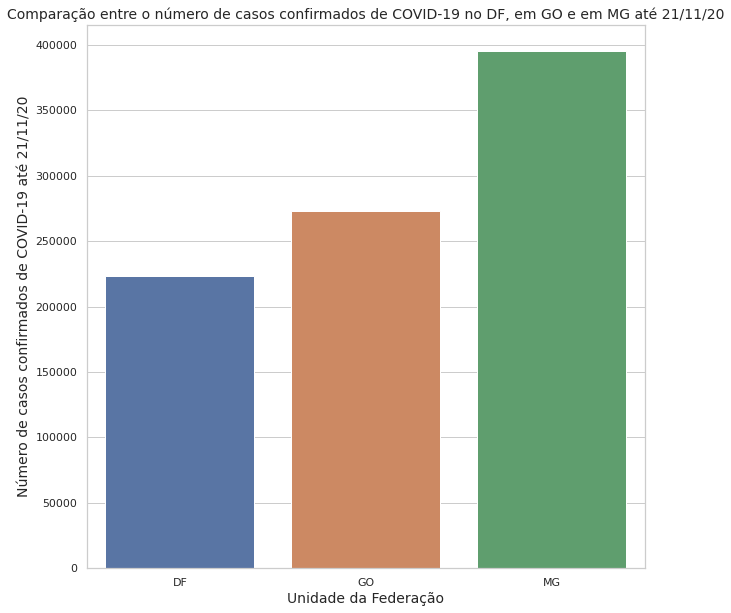

In [18]:
casos_DF = dados_DF.iloc[0]['confirmed']
mortes_DF = dados_DF.iloc[0]['deaths']

casos_GO = dados_GO.iloc[0]['confirmed']
mortes_GO = dados_GO.iloc[0]['deaths']

casos_MG = dados_MG.iloc[0]['confirmed']
mortes_MG = dados_MG.iloc[0]['deaths']

casos = [casos_DF, casos_GO, casos_MG]
mortes = [mortes_DF, mortes_GO, mortes_MG]

plt.figure(figsize=(10,10))
sns.set_theme(style="whitegrid")
sns.barplot(x=['DF', 'GO', 'MG'], y = casos)
plt.xlabel('Unidade da Federação',fontsize=14)
plt.ylabel('Número de casos confirmados de COVID-19 até 21/11/20',fontsize=14)
plt.title('Comparação entre o número de casos confirmados de COVID-19 no DF, em GO e em MG até 21/11/20', fontsize=14)
plt.show()

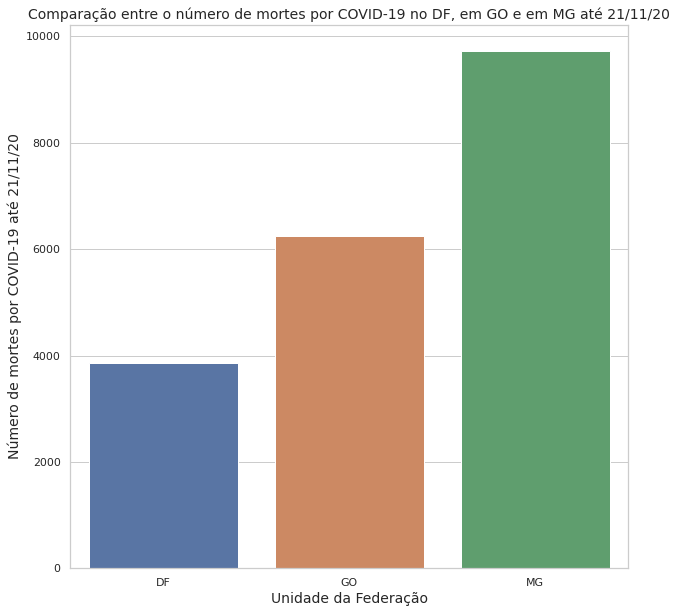

In [19]:
plt.figure(figsize=(10,10))
sns.set_theme(style="whitegrid")
sns.barplot(x=['DF', 'GO', 'MG'], y = mortes)
plt.xlabel('Unidade da Federação',fontsize=14)
plt.ylabel('Número de mortes por COVID-19 até 21/11/20',fontsize=14)
plt.title('Comparação entre o número de mortes por COVID-19 no DF, em GO e em MG até 21/11/20', fontsize=14)
plt.show()

In [20]:
print('A diferença de casos confirmados de COVID-19 entre MG e DF até o dia 21/11/20 é de: {}'.format(dados_MG.iloc[0]['confirmed'] - dados_DF.iloc[0]['confirmed']))
print('A diferença de mortes por COVID-19 entre MG e DF até o dia 21/11/20 é de: {}'.format(dados_MG.iloc[0]['deaths'] - dados_DF.iloc[0]['deaths']))

A diferença de casos confirmados de COVID-19 entre MG e DF até o dia 21/11/20 é de: 172156
A diferença de mortes por COVID-19 entre MG e DF até o dia 21/11/20 é de: 5870


In [21]:
print('A diferença de casos confirmados de COVID-19 entre MG e GO até o dia 21/11/20 é de: {}'.format(dados_MG.iloc[0]['confirmed'] - dados_GO.iloc[0]['confirmed']))
print('A diferença de mortes por COVID-19 entre MG e GO até o dia 21/11/20 é de: {}'.format(dados_MG.iloc[0]['deaths'] - dados_GO.iloc[0]['deaths']))

A diferença de casos confirmados de COVID-19 entre MG e GO até o dia 21/11/20 é de: 122300
A diferença de mortes por COVID-19 entre MG e GO até o dia 21/11/20 é de: 3488


In [22]:
print('O estado de MG possui {:.2f} vezes mais casos confirmados de COVID-19 do que o DF'.format(dados_MG.iloc[0]['confirmed']/dados_DF.iloc[0]['confirmed']))
print('O estado de MG possui {:.2f} vezes mais mortes COVID-19 do que o DF'.format(dados_MG.iloc[0]['deaths']/dados_DF.iloc[0]['deaths']))

O estado de MG possui 1.77 vezes mais casos confirmados de COVID-19 do que o DF
O estado de MG possui 2.52 vezes mais mortes COVID-19 do que o DF


In [23]:
print('O estado de MG possui {:.2f} vezes mais casos confirmados de COVID-19 do que em GO'.format(dados_MG.iloc[0]['confirmed']/dados_GO.iloc[0]['confirmed']))
print('O estado de MG possui {:.2f} vezes mais mortes COVID-19 do que GO'.format(dados_MG.iloc[0]['deaths']/dados_GO.iloc[0]['deaths']))

O estado de MG possui 1.45 vezes mais casos confirmados de COVID-19 do que em GO
O estado de MG possui 1.56 vezes mais mortes COVID-19 do que GO


* Podemos ver, tanto graficamente quanto estatisticamente que **MG é o estado com mais números de casos confirmados e mortes por COVID-19 das Unidades da Federação avaliadas até aqui com 1.77 vezes mais casos confirmados do que o DF, 1.45 vezes mais casos confirmados do que GO, 2.52 vezes mais mortes do que no DF e 1.56 vezes mais mortes do que GO.** 


* Mas assim como na seção anterior, **é importante analisar a quantidade de casos por 100 mil habitantes, já que Minas Gerais é o 3º estado mais populoso do Brasil:**


In [24]:
print('A população do estado de MG é de {} habitantes.'.format(dados_MG.iloc[0]['estimated_population']))
print('A população do estado de GO é de {} habitantes.'.format(dados_GO.iloc[0]['estimated_population']))
print('A população do DF é de {} habitantes.'.format(dados_DF.iloc[0]['estimated_population']))

A população do estado de MG é de 21292666.0 habitantes.
A população do estado de GO é de 7113540.0 habitantes.
A população do DF é de 3055149.0 habitantes.


In [25]:
print('O número casos confirmados de COVID-19 por 100 mil habitantes em MG é: {:.2f}'.format(dados_MG.iloc[0]['confirmed_per_100k_inhabitants']))
print('O número casos confirmados de COVID-19 por 100 mil habitantes em GO é: {:.2f}'.format(dados_GO.iloc[0]['confirmed_per_100k_inhabitants']))
print('O número casos confirmados de COVID-19 por 100 mil habitantes no DF é: {:.2f}'.format(dados_DF.iloc[0]['confirmed_per_100k_inhabitants']))

O número casos confirmados de COVID-19 por 100 mil habitantes em MG é: 1857.61
O número casos confirmados de COVID-19 por 100 mil habitantes em GO é: 3841.04
O número casos confirmados de COVID-19 por 100 mil habitantes no DF é: 7311.53


In [26]:
print('Analisando o número de casos por 100 mil habitantes, a taxa no DF é {:.2f} vezes maior que em MG.'.format(dados_DF.iloc[0]['confirmed_per_100k_inhabitants']/dados_MG.iloc[0]['confirmed_per_100k_inhabitants']))
print('Analisando o número de casos por 100 mil habitantes, a taxa no DF é {:.2f} vezes maior que em GO.'.format(dados_DF.iloc[0]['confirmed_per_100k_inhabitants']/dados_GO.iloc[0]['confirmed_per_100k_inhabitants']))
print('Analisando o número de casos por 100 mil habitantes, a taxa em GO é {:.2f} vezes maior que em MG.'.format(dados_GO.iloc[0]['confirmed_per_100k_inhabitants']/dados_MG.iloc[0]['confirmed_per_100k_inhabitants']))

Analisando o número de casos por 100 mil habitantes, a taxa no DF é 3.94 vezes maior que em MG.
Analisando o número de casos por 100 mil habitantes, a taxa no DF é 1.90 vezes maior que em GO.
Analisando o número de casos por 100 mil habitantes, a taxa em GO é 2.07 vezes maior que em MG.


* Novamente, **quando analisamos o número de casos por 100 mil habitantes, o número de casos no DF é bem superior, cerca de 3.94 vezes maior do que em MG, mesmo com uma população cerca de 6.97 vezes menor.**


* A taxa de casos por 100 mil habitantes de MG **também é menor do que a de GO, que é 2.07 vezes maior.**

* Os dados mostram que a taxa de casos e de mortes no DF por 100 mil habitantes é alta comparada a outros estados. Pesquisas recentes mostram que, inclusive, **a taxa de morte por COVID-19 no DF por milhão de habitantes é a maior do país [4].**

* Vamos então, analisar os casos importados/indefinidos de COVID-19 em MG:

In [27]:
dados_MG.query('city == "Importados/Indefinidos"')

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
418880,2020-11-20,MG,Importados/Indefinidos,city,2835,82,226,True,NaN,NaN,NaN,NaN,0.0289


* Vamos relembrar o número de casos importados/indefinidos de COVID-19 para o DF:

In [28]:
dados_DF.query('city == "Importados/Indefinidos"')

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
22211,2020-11-20,DF,Importados/Indefinidos,city,27419,311,240,True,NaN,NaN,NaN,NaN,0.0113


* Mesmo com uma população quase 7 vezes menor, **a quantidade de casos importados no DF é muito maior do que em MG: cerca de 9.67 vezes mais.**

* Os casos importados correspondem a uma porcentagem bem pequena dos casos totais em MG: **cerca de 0.72% dos casos confirmados de COVID-19 em MG são importados ou indefinidos.**

* Os dados não nos permitem concluir quais casos importados ou indefinidos no DF são do Entorno, mas nos mostram a necessidade de analisar não só o número de casos confirmados no DF, mas também de cidades próximas, **pois a porcentagem de casos importados é alta e o número de casos por 100 mil habitantes também.**

### **6) Análise do histórico de casos de COVID-19 ao longo do ano no DF, em GO e MG**

* Vamos agora analisar não somente o número de casos atual das unidades da Federação analisadas anteriormente, mas também como esse número evoluiu desde março, quando os primeiros casos começaram a ser detectados.

* Para isso, vamos buscar os dados dos estados nos quais a cidade possui campo nulo (NaN) e armazenar em um dataframe:

#### **6.1) Organizando o histórico de dados de COVID-19 no DF ao longo do ano**

In [29]:
# Buscando os dados referentes à coluna 'state' com o valor "DF" e armazenando 
# no dataframe historico_DF
#
historico_DF = dados.query('state == "DF"')

# Selecionando os dados no qual a coluna 'city' é nula (NaN): são os dados 
# referentes à unidade da Federação como um todo
#
historico_DF = historico_DF[historico_DF['city'].isnull()]

# Exibindo os dados para verificar o dataframe criado
#
historico_DF.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
21694,2020-11-21,DF,NaN,state,223378,3862,259,True,3015268.0,3055149.0,53.0,7311.52556,0.0173
21695,2020-11-20,DF,NaN,state,222836,3857,258,False,3015268.0,3055149.0,53.0,7293.78502,0.0173
21696,2020-11-19,DF,NaN,state,222282,3852,257,False,3015268.0,3055149.0,53.0,7275.65169,0.0173
21697,2020-11-18,DF,NaN,state,221526,3845,256,False,3015268.0,3055149.0,53.0,7250.90658,0.0174
21698,2020-11-17,DF,NaN,state,221031,3837,255,False,3015268.0,3055149.0,53.0,7234.70443,0.0174


* Vemos que para cada estado temos os dados de COVID-19 por dia. Para que possamos visualizar isso de uma maneira um pouco melhor graficamente, vamos agrupar esses dados por mês, adaptando os dataframes criados:

In [30]:
# Modificando a data na coluna 'date' para o formato datetime do Python, para 
# podermos agrupar os dados mais facilmente
#
historico_DF['date'] = pd.to_datetime(historico_DF['date'])

# Vamos agrupar os dados nos dataframes por data, modificando a data no formato 
# YYYY-MM-DD para o mês ('%B') com a função strftime. Pegamos a coluna que nos
# interessa ('confirmed', 'death', etc.), agregamos os valores (porque os valores 
# já são atualizados, não precisamos somá-los), organizamos e resetamos o index
# para gerar como resultado um dataframe
#
historico_casos_DF = historico_DF.groupby(historico_DF['date'].dt.strftime('%B'))['confirmed'].agg('first').sort_values().reset_index()
historico_mortes_DF = historico_DF.groupby(historico_DF['date'].dt.strftime('%B'))['deaths'].agg('first').sort_values().reset_index()

In [31]:
# Dicionário para mapear os valores dos meses de inglês para português
#
meses = {
    'March' : 'Março',
    'April' : 'Abril',
    'May' : 'Maio',
    'June' : 'Junho',
    'July' : 'Julho',
    'August' : 'Agosto',
    'September' : 'Setembro',
    'October' : 'Outubro',
    'November' : 'Novembro'
}

# Substituindo os valores da coluna 'date' para os meses em português nos 
# dataframes gerados anteriormente
#
historico_casos_DF = historico_casos_DF.replace({"date" : meses})
historico_mortes_DF = historico_mortes_DF.replace({"date": meses})

In [32]:
# Histórico de casos confirmados de COVID-19 no DF por mês em 2020
#
historico_casos_DF

,date,confirmed
0,Março,333
1,Abril,1423
2,Maio,9780
3,Junho,49218
4,Julho,106292
5,Agosto,162042
6,Setembro,192245
7,Outubro,213245
8,Novembro,223378


In [33]:
# Histórico de mortes por COVID-19 no DF por mês em 2020
#
historico_mortes_DF

,date,deaths
0,Março,3
1,Abril,30
2,Maio,170
3,Junho,587
4,Julho,1469
5,Agosto,2521
6,Setembro,3255
7,Outubro,3683
8,Novembro,3862


#### **6.2) Organizando o histórico de dados de COVID-19 em GO ao longo do ano**

In [34]:
# Buscando os dados referentes à coluna 'state' com o valor "GO" e armazenando 
# no dataframe historico_GO
#
historico_GO = dados.query('state == "GO"')

# Selecionando os dados no qual a coluna 'city' é nula (NaN): são os dados 
# referentes à unidade da Federação como um todo
#
historico_GO = historico_GO[historico_GO['city'].isnull()]

# Exibindo os dados para verificar o dataframe criado
#
historico_GO.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
190344,2020-11-21,GO,NaN,state,273234,6244,255,True,7018354.0,7113540.0,52.0,3841.04117,0.0229
190345,2020-11-20,GO,NaN,state,272956,6224,254,False,7018354.0,7113540.0,52.0,3837.13313,0.0228
190346,2020-11-19,GO,NaN,state,272094,6201,253,False,7018354.0,7113540.0,52.0,3825.01539,0.0228
190347,2020-11-18,GO,NaN,state,270918,6130,252,False,7018354.0,7113540.0,52.0,3808.48354,0.0226
190348,2020-11-17,GO,NaN,state,269805,6092,251,False,7018354.0,7113540.0,52.0,3792.83732,0.0226


In [35]:
# Realizando os mesmos passos anteriores, para gerar os dataframes de casos 
# confirmados e mortes no estado de Goiás:
#
historico_GO['date'] = pd.to_datetime(historico_GO['date'])
historico_casos_GO = historico_GO.groupby(historico_GO['date'].dt.strftime('%B'))['confirmed'].agg('first').sort_values().reset_index()
historico_mortes_GO = historico_GO.groupby(historico_GO['date'].dt.strftime('%B'))['deaths'].agg('first').sort_values().reset_index()

# Colocando os meses em português nos dataframes criados
#
historico_casos_GO = historico_casos_GO.replace({"date": meses})
historico_mortes_GO = historico_mortes_GO.replace({"date": meses})

In [36]:
# Histórico de casos confirmados de COVID-19 em GO por mês em 2020
#
historico_casos_GO

,date,confirmed
0,Março,65
1,Abril,781
2,Maio,3726
3,Junho,24910
4,Julho,69249
5,Agosto,133796
6,Setembro,211240
7,Outubro,255646
8,Novembro,273234


In [37]:
# Histórico de mortes por COVID-19 em GO por mês em 2020
#
historico_mortes_GO

,date,deaths
0,Março,1
1,Abril,29
2,Maio,124
3,Junho,491
4,Julho,1677
5,Agosto,3159
6,Setembro,4705
7,Outubro,5755
8,Novembro,6244


#### **6.3) Organizando o histórico de dados de COVID-19 em MG ao longo do ano**

In [38]:
# Buscando os dados referentes à coluna 'state' com o valor "MG" e armazenando 
# no dataframe historico_MG
#
historico_MG = dados.query('state == "MG"')

# Selecionando os dados no qual a coluna 'city' é nula (NaN): são os dados 
# referentes à unidade da Federação como um todo
#
historico_MG = historico_MG[historico_MG['city'].isnull()]

# Exibindo os dados para verificar o dataframe criado
#
historico_MG.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
363204,2020-11-21,MG,NaN,state,395534,9732,257,True,21168791.0,21292666.0,31.0,1857.60675,0.0246
363205,2020-11-20,MG,NaN,state,393110,9688,256,False,21168791.0,21292666.0,31.0,1846.22254,0.0246
363206,2020-11-19,MG,NaN,state,390337,9648,255,False,21168791.0,21292666.0,31.0,1833.19928,0.0247
363207,2020-11-18,MG,NaN,state,387751,9605,254,False,21168791.0,21292666.0,31.0,1821.05425,0.0248
363208,2020-11-17,MG,NaN,state,385427,9531,253,False,21168791.0,21292666.0,31.0,1810.13970,0.0247


In [39]:
# Realizando os mesmos passos anteriores, para gerar os dataframes de casos 
# confirmados e mortes no estado de Goiás:
#
historico_MG['date'] = pd.to_datetime(historico_MG['date'])
historico_casos_MG = historico_MG.groupby(historico_MG['date'].dt.strftime('%B'))['confirmed'].agg('first').sort_values().reset_index()
historico_mortes_MG = historico_MG.groupby(historico_MG['date'].dt.strftime('%B'))['deaths'].agg('first').sort_values().reset_index()

# Colocando os meses em português nos dataframes criados
#
historico_casos_MG = historico_casos_MG.replace({"date": meses})
historico_mortes_MG = historico_mortes_MG.replace({"date": meses})

In [40]:
# Histórico de casos confirmados de COVID-19 em MG por mês em 2020
#
historico_casos_MG

,date,confirmed
0,Março,275
1,Abril,1827
2,Maio,10464
3,Junho,45001
4,Julho,127106
5,Agosto,216557
6,Setembro,295169
7,Outubro,358971
8,Novembro,395534


In [41]:
# Histórico de mortes por COVID-19 em MG por mês em 2020
#
historico_mortes_MG

,date,deaths
0,Março,2
1,Abril,82
2,Maio,271
3,Junho,965
4,Julho,2769
5,Agosto,5335
6,Setembro,7360
7,Outubro,9015
8,Novembro,9732


#### **6.4) Comparação dos históricos de dados de COVID-19 no DF, em GO  e em MG ao longo do ano**

* Vamos então gerar um gráfico comparando os casos confirmados de COVID-19 no DF, em GO e em MG:

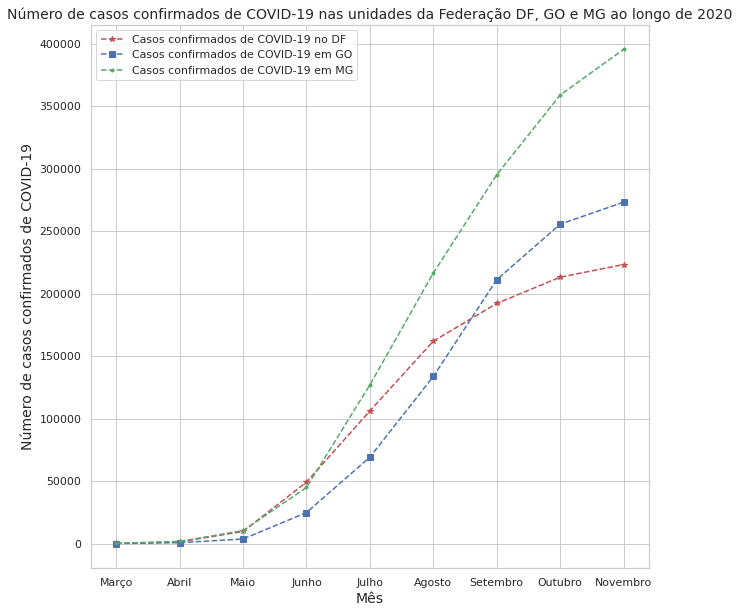

In [42]:
plt.figure(figsize=(10,10))

plt.plot(historico_casos_DF['date'], historico_casos_DF['confirmed'], 'r*--', 
         historico_casos_GO['date'], historico_casos_GO['confirmed'], 'bs--', 
         historico_casos_MG['date'], historico_casos_MG['confirmed'], 'g.--')

plt.legend(('Casos confirmados de COVID-19 no DF',
            'Casos confirmados de COVID-19 em GO',
            'Casos confirmados de COVID-19 em MG'))

plt.ylabel('Número de casos confirmados de COVID-19', fontsize=14)
plt.xlabel('Mês', fontsize=14)
plt.title('Número de casos confirmados de COVID-19 nas unidades da Federação DF, GO e MG ao longo de 2020', fontsize=14)

plt.show()

* O gráfico nos mostra o que era esperado: os casos de COVID-19 aumentaram ao longo dos meses. Mas é interessante notar como os casos aumentam significativamente a partir de Maio, momento no qual enfrentamos o ponto mais crítico da pandemia.

* No caso do DF, o número foi maior do que em GO até meados de Agosto. A partir dai, o número de casos em GO se tornou maior.

* MG sempre possuiu mais casos confirmados do que DF e GO. Vale lembrar entretanto, que MG é um estado muito mais populoso e isso é esperado, conforme já vimos anteriormente.

* Vamos agora analisar os dados de mortes por COVID-19 no DF, em MG e em GO:

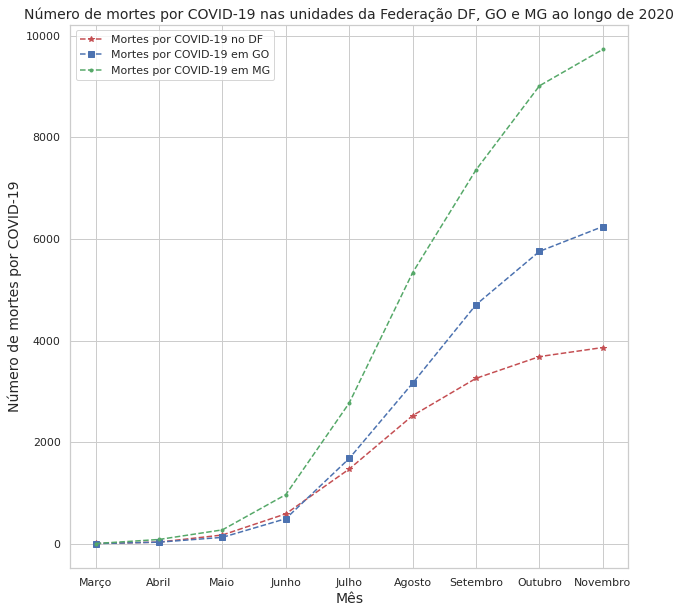

In [43]:
plt.figure(figsize=(10,10))

plt.plot(historico_mortes_DF['date'], historico_mortes_DF['deaths'], 'r*--', 
         historico_mortes_GO['date'], historico_mortes_GO['deaths'], 'bs--', 
         historico_mortes_MG['date'], historico_mortes_MG['deaths'], 'g.--')

plt.legend(('Mortes por COVID-19 no DF',
            'Mortes por COVID-19 em GO',
            'Mortes por COVID-19 em MG'))

plt.ylabel('Número de mortes por COVID-19', fontsize=14)
plt.xlabel('Mês', fontsize=14)
plt.title('Número de mortes por COVID-19 nas unidades da Federação DF, GO e MG ao longo de 2020', fontsize=14)

plt.show()

* O número de mortes também segue o padrão do número de casos confirmados: inicialmente um número maior no DF do que em GO, que mudam de posição em meados de Junho desta vez. 

* As mortes em MG são mais numerosas que nesses estados, mais uma vez, por conta do tamanho de sua população.

* A população mais numerosa de MG torna a análise inicial mais complicada. Vamos analisar o mesmo gráfico, mas agora do ponto de vista de casos confirmados por 100 mil habitantes:

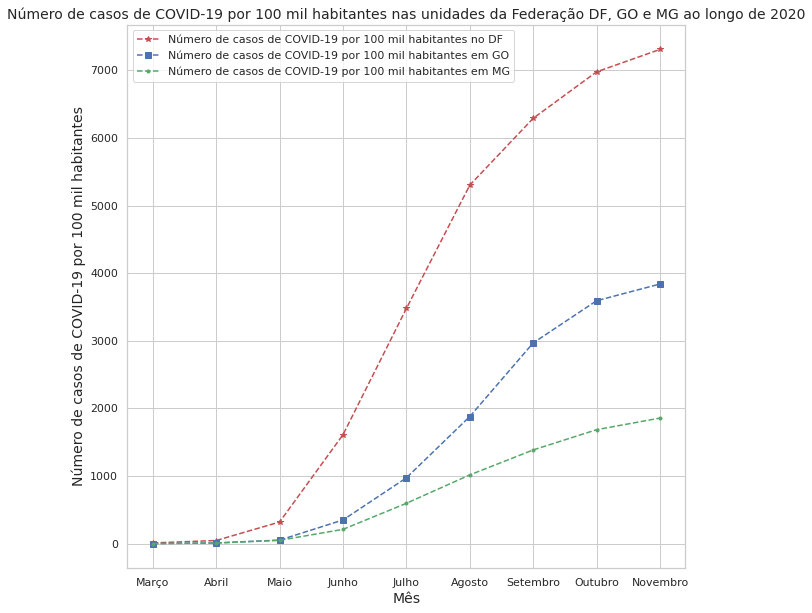

In [44]:
# Realizando os mesmos passos anteriores, para gerar os dataframes de casos 
# confirmados e mortes no estado de Goiás:
#
historico_casos_100k_DF = historico_DF.groupby(historico_DF['date'].dt.strftime('%B'))['confirmed_per_100k_inhabitants'].agg('first').sort_values().reset_index()
historico_casos_100k_GO = historico_GO.groupby(historico_GO['date'].dt.strftime('%B'))['confirmed_per_100k_inhabitants'].agg('first').sort_values().reset_index()
historico_casos_100k_MG = historico_MG.groupby(historico_MG['date'].dt.strftime('%B'))['confirmed_per_100k_inhabitants'].agg('first').sort_values().reset_index()

# Colocando os meses em português nos dataframes criados
#
historico_casos_100k_DF = historico_casos_100k_DF.replace({"date": meses})
historico_casos_100k_GO = historico_casos_100k_GO.replace({"date": meses})
historico_casos_100k_MG = historico_casos_100k_MG.replace({"date": meses})

plt.figure(figsize=(10,10))

plt.plot(historico_casos_100k_DF['date'], historico_casos_100k_DF['confirmed_per_100k_inhabitants'], 'r*--', 
         historico_casos_100k_GO['date'], historico_casos_100k_GO['confirmed_per_100k_inhabitants'], 'bs--', 
         historico_casos_100k_MG['date'], historico_casos_100k_MG['confirmed_per_100k_inhabitants'], 'g.--')

plt.legend(('Número de casos de COVID-19 por 100 mil habitantes no DF',
            'Número de casos de COVID-19 por 100 mil habitantes em GO',
            'Número de casos de COVID-19 por 100 mil habitantes em MG'))

plt.ylabel('Número de casos de COVID-19 por 100 mil habitantes', fontsize=14)
plt.xlabel('Mês', fontsize=14)
plt.title('Número de casos de COVID-19 por 100 mil habitantes nas unidades da Federação DF, GO e MG ao longo de 2020', fontsize=14)

plt.show()

* O gráfico mostra que, mesmo com a menor população das unidades da Federação analisadas aqui, o DF possui um total de casos confirmados por 100 mil habitantes bem maior do que os estados de GO e MG e que essa tendência se manteve em todos os meses do ano.

* Isso não significa entretanto que o DF seja uma espécie de epicentro da pandemia no país. Na verdade, o DF é um dos locais que mais testam para COVID-19 no país [5], o que pode indicar que o número de casos no DF é mais realista do que em outros estados, que sofrem com subnotificações pela falta de teste.

* Portanto, o que se pode concluir neste etapa é que **há um alto número de casos por 100 mil habitantes no DF comparado com alguns estados mais próximos**.



* Além disso, como já vimos, **há uma alta taxa de casos importados/indefinidos (12.3%) no DF**, o que justifica analisar dados de estados ou cidades mais próximas geograficamente para analisar como a situação referente ao COVID-19 nesses locais pode influenciar o DF. 

### **7) Analisando os dados de COVID-19 nas cidades do Entorno**

* Agora que analisamos os estados de MG e GO em sua totalidade, podemos analisar as cidades do Entorno propriamente ditas.

* Vamos criar listas com os nomes das cidades do Entorno que são do estado de Goiás e das cidades do Entonro que fazem parte de MG:

####**7.1) Dados de COVID-19 das cidades do Entorno que fazem parte de GO**

In [45]:
# Lista com as cidades do Entorno que fazem parte de Goiás
#
cidades_entorno_GO = ["Abadiânia", "Água Fria de Goiás", "Águas Lindas de Goiás", 
                      "Alexânia", "Alto Paraíso de Goiás", "Alvorada do Norte", 
                      "Barro Alto", "Cabeceiras", "Cavalcante", "Cidade Ocidental", 
                      "Cocalzinho de Goiás", "Corumbá de Goiás", "Cristalina",
                      "Flores de Goiás", "Formosa", "Goianésia", "Luziânia", 
                      "Mimoso de Goiás", "Niquelândia", "Novo Gama", "Padre Bernardo",
                      "Pirenópolis", "Planaltina", "Santo Antônio do Descoberto",
                      "São João d’Aliança", "Simolândia", "Valparaíso de Goiás",
                      "Vila Boa", "Vila Propício"];

# Lista com as cidades do Entorno que fazem parte de Minas Gerais
#
cidades_entorno_MG = ["Arinos", "Buritis", "Cabeceira Grande", "Unaí"];

In [46]:
# Criando um dataframe que armazene as informações das cidades do Entorno de GO
#
dados_GO_entorno = dados_GO[dados_GO['city'].isin(cidades_entorno_GO)]

# Verificando o dataframe criado
#
dados_GO_entorno.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
190782,2020-11-19,GO,Abadiânia,city,176,12,175,True,20042.0,20461.0,5200100.0,860.17301,0.0682
191297,2020-11-19,GO,Alexânia,city,1295,21,195,True,27653.0,28010.0,5200308.0,4623.34880,0.0162
191856,2020-11-19,GO,Alto Paraíso de Goiás,city,310,0,194,True,7624.0,7688.0,5200605.0,4032.25806,0.0000
192050,2020-11-19,GO,Alvorada do Norte,city,294,1,156,True,8660.0,8705.0,5200803.0,3377.36933,0.0034
195585,2020-11-19,GO,Barro Alto,city,582,7,208,True,11167.0,11408.0,5203203.0,5101.68303,0.0120


In [47]:
print('O número total de casos confirmados de COVID-19 nos estados de GO que fazem parte do Entorno até 19/11/20 é: {}'.format(dados_GO_entorno['confirmed'].sum()))
print('O número total de mortes por COVID-19 nos estados de GO que fazem parte do Entorno até 19/11/20 é: {}'.format(dados_GO_entorno['deaths'].sum()))
print('A média de casos confirmados de COVID-19 por 100 mil habitantes nos estados de GO que fazem parte do Entorno até 19/11/20 é: {:.2f}'.format(dados_GO_entorno['confirmed_per_100k_inhabitants'].mean()))

O número total de casos confirmados de COVID-19 nos estados de GO que fazem parte do Entorno até 19/11/20 é: 41626
O número total de mortes por COVID-19 nos estados de GO que fazem parte do Entorno até 19/11/20 é: 931
A média de casos confirmados de COVID-19 por 100 mil habitantes nos estados de GO que fazem parte do Entorno até 19/11/20 é: 2527.65


In [48]:
print('O número de casos confirmados de COVID-19 das cidades do Entorno de GO corresponde a {:.2f}% dos casos confirmados de GO'.format(dados_GO_entorno['confirmed'].sum()/dados_GO.iloc[0]['confirmed']*100))
print('O número de mortes por COVID-19 das cidades do Entorno de GO corresponde a {:.2f}% das mortes de GO'.format(dados_GO_entorno['deaths'].sum()/dados_GO.iloc[0]['deaths']*100))
print('O número de casos de COVID-19 por 100 mil habitantes de GO é {:.2f} vezes maior que a média de casos por 100 mil habitantes das cidades do Entorno'.format(dados_GO.iloc[0]['confirmed_per_100k_inhabitants']/dados_GO_entorno['confirmed_per_100k_inhabitants'].mean()))

O número de casos confirmados de COVID-19 das cidades do Entorno de GO corresponde a 15.23% dos casos confirmados de GO
O número de mortes por COVID-19 das cidades do Entorno de GO corresponde a 14.91% das mortes de GO
O número de casos de COVID-19 por 100 mil habitantes de GO é 1.52 vezes maior que a média de casos por 100 mil habitantes das cidades do Entorno


* As cidades do Entorno de GO correspondem a **15.23% dos casos de COVID-19 do estado de Goiás, e 14.91% das mortes por COVID-19 do estado.**

* A média de casos confirmados por 100 mil habitantes é relativamente próxima ao número ao número de casos por 100 mil habitantes do estado de GO.

* Portanto, a região do Entorno não corresponde a uma porcentagem tão grande dos casos de Goiás. É uma região pequena comparada ao restante do Estado, mas pela proximidade com o DF, é importante monitorar a situação da região, ainda mais considerando a grande taxa de casos importados/indefinidos que vimos anteriormente no DF.

#### **7.2) Dados de COVID-19 das cidades do Entorno que pertencem a MG**

In [49]:
# Selecionando as cidades de Minas Gerais que fazem parte do Entorno e armazenando em um dataframe
#
dados_MG_entorno = dados_MG[dados_MG['city'].isin(cidades_entorno_MG)]

# Verificando o dataframe criado
#
dados_MG_entorno.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
370642,2020-11-20,MG,Arinos,city,129,3,144,True,17875.0,17862.0,3104502.0,722.20356,0.0233
379263,2020-11-20,MG,Buritis,city,435,3,152,True,24841.0,25013.0,3109303.0,1739.09567,0.0069
379566,2020-11-20,MG,Cabeceira Grande,city,48,2,138,True,6949.0,6988.0,3109451.0,686.89181,0.0417
496930,2020-11-20,MG,Unaí,city,2938,57,218,True,84378.0,84930.0,3170404.0,3459.31944,0.0194


In [50]:
print('O número total de casos confirmados de COVID-19 nos estados de MG que fazem parte do Entorno até 20/11/20 é: {}'.format(dados_MG_entorno['confirmed'].sum()))
print('O número total de mortes por COVID-19 nos estados de MG que fazem parte do Entorno até 20/11/20 é: {}'.format(dados_MG_entorno['deaths'].sum()))
print('A média de casos confirmados de COVID-19 por 100 mil habitantes nos estados de MG que fazem parte do Entorno até 20/11/20 é: {:.2f}'.format(dados_MG_entorno['confirmed_per_100k_inhabitants'].mean()))

O número total de casos confirmados de COVID-19 nos estados de MG que fazem parte do Entorno até 20/11/20 é: 3550
O número total de mortes por COVID-19 nos estados de MG que fazem parte do Entorno até 20/11/20 é: 65
A média de casos confirmados de COVID-19 por 100 mil habitantes nos estados de MG que fazem parte do Entorno até 20/11/20 é: 1651.88


In [51]:
print('O número de casos confirmados de COVID-19 das cidades do Entorno de MG corresponde a {:.2f}% dos casos confirmados de MG'.format(dados_MG_entorno['confirmed'].sum()/dados_MG.iloc[0]['confirmed']*100))
print('O número de mortes por COVID-19 das cidades do Entorno de MG corresponde a {:.2f}% das mortes de MG'.format(dados_GO_entorno['deaths'].sum()/dados_MG.iloc[0]['deaths']*100))
print('O número de casos de COVID-19 por 100 mil habitantes de MG é {:.2f} vezes maior que a média de casos por 100 mil habitantes das cidades do Entorno'.format(dados_MG.iloc[0]['confirmed_per_100k_inhabitants']/dados_MG_entorno['confirmed_per_100k_inhabitants'].mean()))

O número de casos confirmados de COVID-19 das cidades do Entorno de MG corresponde a 0.90% dos casos confirmados de MG
O número de mortes por COVID-19 das cidades do Entorno de MG corresponde a 9.57% das mortes de MG
O número de casos de COVID-19 por 100 mil habitantes de MG é 1.12 vezes maior que a média de casos por 100 mil habitantes das cidades do Entorno


* **Os casos de cidades do Entorno que são de MG são muito poucos comparados com os casos do estado de MG, assim como o número de mortes.** 

* Isso é de esperar tendo em vista que são somente 4 cidades e MG é o 3º estado brasileiro mais populoso.

* Já a média de casos por 100 mil habitantes nessas 4 cidades do Entorno é próxima ao número de casos por 100 mil habitantes do estado como um todo. 

* De novo, apesar de ser comportar parecido com o estado do qual faz parte (em termos de casos por 100 mil habitantes), **as cidades do Entorno correspondem a uma parcela de casos muito pequena do estado de MG**.

* Mais uma vez, convém analisar os casos nessa região pela **proximidade geográfica com o DF e pelo alto número de casos importados/importados do DF**.

### **8) Histórico de casos de COVID-19 ao longo do ano nas cidades do Entorno**

* Vamos então analisar o histórico de casos e de mortes nas cidades do Entorno, para analisar com os históricos de seus respectivos estados e do DF.

####**8.1) Organizando o histórico de dados das cidades do Entorno que fazem parte de GO**

In [52]:
# Reunindo os dados referentes ao estado de GO
#
historico_entorno_GO = dados.query('state == "GO"')

# Selecionando somente as cidades que fazem parte do Entorno
#
historico_entorno_GO = historico_entorno_GO[historico_entorno_GO['city'].isin(cidades_entorno_GO)]

# Visualizando os dados selecionados
#
historico_entorno_GO.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
190782,2020-11-19,GO,Abadiânia,city,176,12,175,True,20042.0,20461.0,5200100.0,860.17301,0.0682
190783,2020-11-18,GO,Abadiânia,city,176,12,174,False,20042.0,20461.0,5200100.0,860.17301,0.0682
190784,2020-11-17,GO,Abadiânia,city,176,12,173,False,20042.0,20461.0,5200100.0,860.17301,0.0682
190785,2020-11-16,GO,Abadiânia,city,176,12,172,False,20042.0,20461.0,5200100.0,860.17301,0.0682
190786,2020-11-15,GO,Abadiânia,city,176,12,171,False,20042.0,20461.0,5200100.0,860.17301,0.0682


In [53]:
# Agrupando os casos confirmados por data, somando os valores (para obter a soma de todos os dados das cidades do Entorno), 
# organizando e resetando o index para gerar um dataframe
#
historico_casos_entorno_GO = historico_entorno_GO.groupby(historico_entorno_GO['date'])['confirmed'].sum().sort_values().reset_index()

# Convertendo a data para o formato datetime
#
historico_casos_entorno_GO['date'] = pd.to_datetime(historico_casos_entorno_GO['date'])

# Agrupando novamente por data, para agrupar os dados por mês('%B') usando a função strftime. 
# Os valores são agregados, selecionados e o index é resetado para gerar um dataframe
#
historico_casos_entorno_GO = historico_casos_entorno_GO.groupby(historico_casos_entorno_GO['date'].dt.strftime('%B'))['confirmed'].agg('last').sort_values().reset_index()

In [54]:
# Agrupando os casos confirmados por data, somando os valores (para obter a soma de todos os dados das cidades do Entorno), 
# organizando e resetando o index para gerar um dataframe
#
historico_mortes_entorno_GO = historico_entorno_GO.groupby(historico_entorno_GO['date'])['deaths'].sum().sort_values().reset_index()

# Convertendo a data para o formato datetime
#
historico_mortes_entorno_GO['date'] = pd.to_datetime(historico_mortes_entorno_GO['date'])

# Agrupando novamente por data, para agrupar os dados por mês('%B') usando a função strftime. 
# Os valores são agregados, selecionados e o index é resetado para gerar um dataframe
#
historico_mortes_entorno_GO = historico_mortes_entorno_GO.groupby(historico_mortes_entorno_GO['date'].dt.strftime('%B'))['deaths'].agg('last').sort_values().reset_index()

In [55]:
# Colocando os meses em português nos dataframes criados
#
historico_casos_entorno_GO = historico_casos_entorno_GO.replace({"date": meses})
historico_mortes_entorno_GO = historico_mortes_entorno_GO.replace({"date": meses})

In [56]:
# Número de casos confirmados de COVID-19 nas cidades do Entorno em GO por mês até 19/11/20
#
historico_casos_entorno_GO

,date,confirmed
0,Março,6
1,Abril,92
2,Maio,664
3,Junho,4266
4,Julho,10996
5,Agosto,21371
6,Setembro,31882
7,Outubro,38646
8,Novembro,41626


In [57]:
# Número de mortes por COVID-19 nas cidades do Entorno em GO por mês até 19/11/20
#
historico_mortes_entorno_GO

,date,deaths
0,Março,1
1,Abril,9
2,Maio,27
3,Junho,107
4,Julho,311
5,Agosto,553
6,Setembro,761
7,Outubro,877
8,Novembro,931


####**8.2) Organizando o histórico de dados das cidades do Entorno que fazem parte de MG**

In [58]:
# Selecionando os dados referentes ao estado de MG
#
historico_entorno_MG = dados.query('state == "MG"')

# Selecionando somente as cidades mineiras que fazem parte do Entorno
#
historico_entorno_MG = historico_entorno_MG[historico_entorno_MG['city'].isin(cidades_entorno_MG)]

# Visualizando o dataframe obtido
#
historico_entorno_MG.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
370642,2020-11-20,MG,Arinos,city,129,3,144,True,17875.0,17862.0,3104502.0,722.20356,0.0233
370643,2020-11-19,MG,Arinos,city,129,3,143,False,17875.0,17862.0,3104502.0,722.20356,0.0233
370644,2020-11-16,MG,Arinos,city,127,3,142,False,17875.0,17862.0,3104502.0,711.00661,0.0236
370645,2020-11-14,MG,Arinos,city,126,3,141,False,17875.0,17862.0,3104502.0,705.40813,0.0238
370646,2020-11-13,MG,Arinos,city,126,3,140,False,17875.0,17862.0,3104502.0,705.40813,0.0238


In [59]:
# Agrupando os casos confirmados por data, somando os valores (para obter a soma de todos os dados das cidades do Entorno), 
# organizando e resetando o index para gerar um dataframe
#
historico_casos_entorno_MG = historico_entorno_MG.groupby(historico_entorno_MG['date'])['confirmed'].sum().sort_values().reset_index()

# Convertendo a data para o formato datetime
#
historico_casos_entorno_MG['date'] = pd.to_datetime(historico_casos_entorno_MG['date'])

# Agrupando novamente por data, para agrupar os dados por mês('%B') usando a função strftime. 
# Os valores são agregados, selecionados e o index é resetado para gerar um dataframe
#
historico_casos_entorno_MG = historico_casos_entorno_MG.groupby(historico_casos_entorno_MG['date'].dt.strftime('%B'))['confirmed'].agg('last').sort_values().reset_index()

In [60]:
# Agrupando os casos confirmados por data, somando os valores (para obter a soma de todos os dados das cidades do Entorno), 
# organizando e resetando o index para gerar um dataframe
#
historico_mortes_entorno_MG = historico_entorno_MG.groupby(historico_entorno_MG['date'])['deaths'].sum().sort_values().reset_index()

# Convertendo a data para o formato datetime
#
historico_mortes_entorno_MG['date'] = pd.to_datetime(historico_mortes_entorno_MG['date'])

# Agrupando novamente por data, para agrupar os dados por mês('%B') usando a função strftime. 
# Os valores são agregados, selecionados e o index é resetado para gerar um dataframe
#
historico_mortes_entorno_MG = historico_mortes_entorno_MG.groupby(historico_mortes_entorno_MG['date'].dt.strftime('%B'))['deaths'].agg('last').sort_values().reset_index()

In [61]:
# Colocando os meses em português nos dataframes criados
#
historico_casos_entorno_MG = historico_casos_entorno_MG.replace({"date": meses})
historico_mortes_entorno_MG = historico_mortes_entorno_MG.replace({"date": meses})

In [62]:
# Número de casos confirmados de COVID-19 nas cidades do Entorno em MG por mês até 20/11/20
#
historico_casos_entorno_MG

,date,confirmed
0,Março,1
1,Abril,2
2,Maio,61
3,Junho,419
4,Julho,1321
5,Agosto,2222
6,Setembro,3007
7,Outubro,3253
8,Novembro,3550


In [63]:
# Número de mortes por COVID-19 nas cidades do Entorno em MG por mês até 20/11/20
#
historico_mortes_entorno_MG

,date,deaths
0,Abril,0
1,Março,0
2,Maio,0
3,Junho,1
4,Julho,14
5,Agosto,41
6,Setembro,56
7,Outubro,61
8,Novembro,65


####**8.3) Comparação dos casos de COVID-19 ao longo do ano nas cidades do Entorno de GO, no DF e em GO**

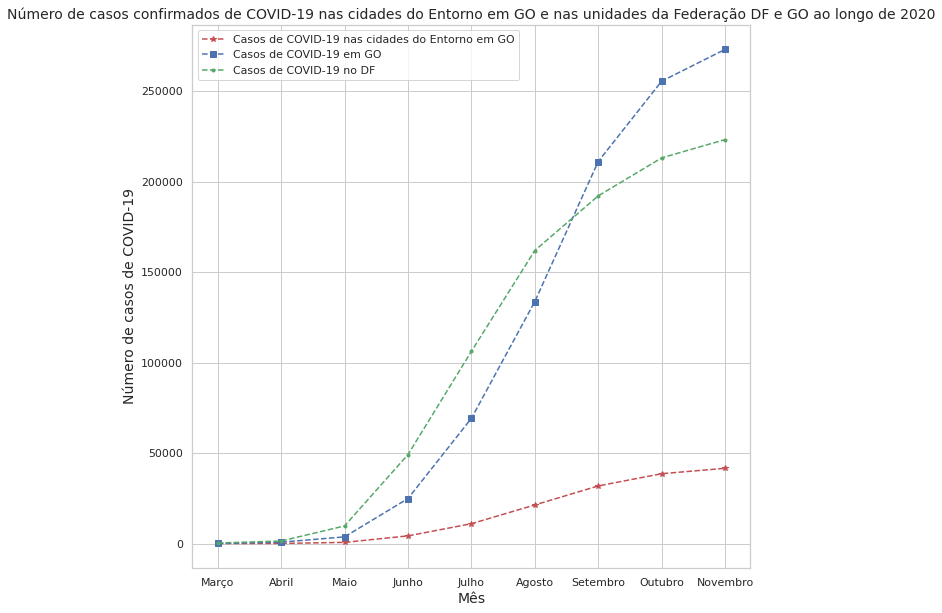

In [64]:
plt.figure(figsize=(10,10))

plt.plot(historico_casos_entorno_GO['date'], historico_casos_entorno_GO['confirmed'], 'r*--', 
         historico_casos_GO['date'], historico_casos_GO['confirmed'], 'bs--', 
         historico_casos_DF['date'], historico_casos_DF['confirmed'], 'g.--')

plt.ylabel('Número de casos de COVID-19', fontsize=14)
plt.xlabel('Mês', fontsize=14)
plt.title('Número de casos confirmados de COVID-19 nas cidades do Entorno em GO e nas unidades da Federação DF e GO ao longo de 2020', fontsize=14)

plt.legend(('Casos de COVID-19 nas cidades do Entorno em GO',
            'Casos de COVID-19 em GO',
            'Casos de COVID-19 no DF'))

plt.show()

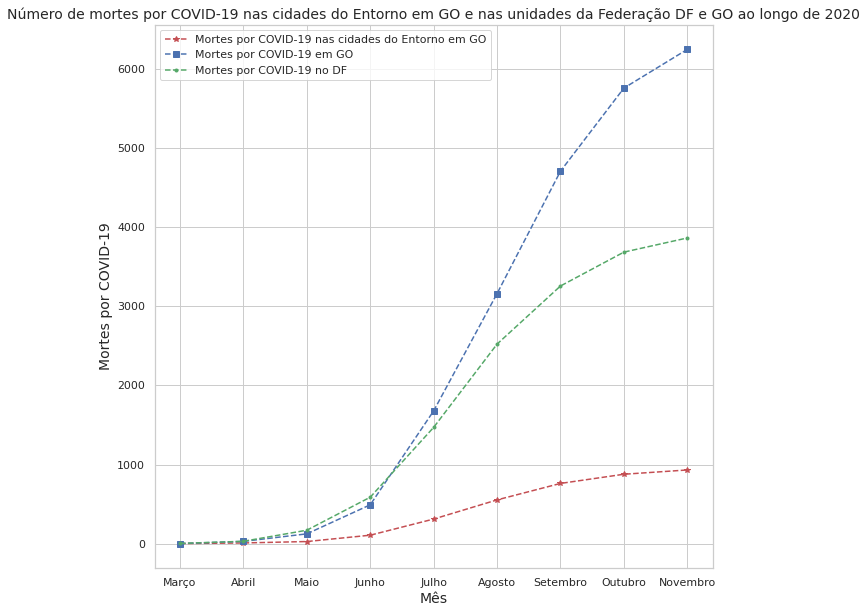

In [65]:
plt.figure(figsize=(10,10))

plt.plot(historico_mortes_entorno_GO['date'], historico_mortes_entorno_GO['deaths'], 'r*--', 
         historico_mortes_GO['date'], historico_mortes_GO['deaths'], 'bs--', 
         historico_mortes_DF['date'], historico_mortes_DF['deaths'], 'g.--')

plt.ylabel('Mortes por COVID-19', fontsize=14)
plt.xlabel('Mês', fontsize=14)
plt.title('Número de mortes por COVID-19 nas cidades do Entorno em GO e nas unidades da Federação DF e GO ao longo de 2020', fontsize=14)

plt.legend(('Mortes por COVID-19 nas cidades do Entorno em GO',
            'Mortes por COVID-19 em GO',
            'Mortes por COVID-19 no DF'))

plt.show()

* Tanto para o número de casos confirmados quanto para o número de mortes por COVID-19, os valores nas cidades do Entorno são bem menores, como era de se esperar.

* De novo, precisamos dos dados por 100 mil habitantes para termos dados mais plausíveis para comparação:

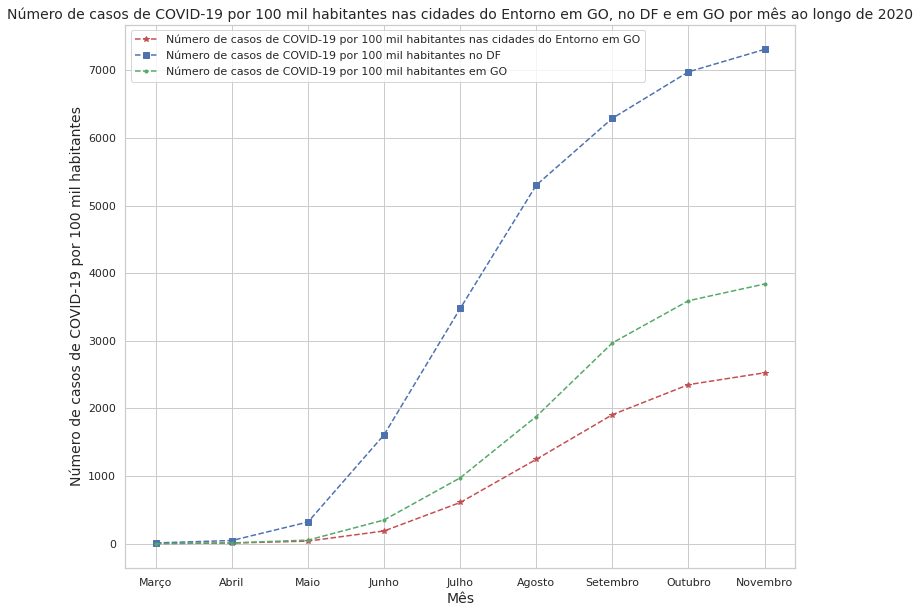

In [66]:
# Agrupando os casos confirmados por data, obtendo a média dos valores (para obter a média dos dados das cidades do Entorno), 
# organizando e resetando o index para gerar um dataframe
#
historico_casos_100k_entorno_GO = historico_entorno_GO.groupby(historico_entorno_GO['date'])['confirmed_per_100k_inhabitants'].mean().sort_values().reset_index()

# Convertendo a data para o formato datetime
#
historico_casos_100k_entorno_GO['date'] = pd.to_datetime(historico_casos_100k_entorno_GO['date'])

# Agrupando novamente por data, para agrupar os dados por mês('%B') usando a função strftime. 
# Os valores são agregados, selecionados e o index é resetado para gerar um dataframe
#
historico_casos_100k_entorno_GO = historico_casos_100k_entorno_GO.groupby(historico_casos_100k_entorno_GO['date'].dt.strftime('%B'))['confirmed_per_100k_inhabitants'].agg('last').sort_values().reset_index()

# Colocando os meses em português nos dataframes criados
#
historico_casos_100k_entorno_GO = historico_casos_100k_entorno_GO.replace({"date": meses})

plt.figure(figsize=(12,10))

plt.plot(historico_casos_100k_entorno_GO['date'], historico_casos_100k_entorno_GO['confirmed_per_100k_inhabitants'], 'r*--', 
         historico_casos_100k_DF['date'], historico_casos_100k_DF['confirmed_per_100k_inhabitants'], 'bs--', 
         historico_casos_100k_GO['date'], historico_casos_100k_GO['confirmed_per_100k_inhabitants'], 'g.--')

plt.legend(('Número de casos de COVID-19 por 100 mil habitantes nas cidades do Entorno em GO',
            'Número de casos de COVID-19 por 100 mil habitantes no DF',
            'Número de casos de COVID-19 por 100 mil habitantes em GO'))

plt.ylabel('Número de casos de COVID-19 por 100 mil habitantes', fontsize=14)
plt.xlabel('Mês', fontsize=14)
plt.title('Número de casos de COVID-19 por 100 mil habitantes nas cidades do Entorno em GO, no DF e em GO por mês ao longo de 2020', fontsize=14)

plt.show()

* Agora sim temos condições de realizar melhores comparações. Vemos, por exemplo, que assim como anteriormente, **o DF continua com o maior número de casos confirmados de COVID-19 por 100 mil habitantes quando comparado ao estado de GO e às cidades do Entorno que pertencem ao GO**.

* Percebe-se também que **o comportamento das cidades do Entorno por 100 mil habitantes de aproxima muito mais do comportamento do estado de GO**, do que quando analisamos somente o total de casos confirmados, por conta da maior população que o estado de GO possui no total.

* Com base somente nos dados tratados aqui, **não é possível estabelecer uma relação clara entre os casos de COVID-19 no Entorno e os casos do DF**.

* Entretanto os dados dessa região se aproximam dos dados de Goiás, com relação ao número de 100 mil habitantes. **Pela proximidade geográfica, e pela alta taxa de casos importados/indefinidos no DF, é importante analisar os dados dessa região**.

In [67]:
dados_DF.iloc[0]['estimated_population']/dados_GO_entorno['estimated_population'].sum()

2.050757635762932

####**8.4) Comparação dos casos de COVID-19 ao longo do ano nas cidades do Entorno de GO, no DF e em MG**

* Se no caso das cidades do Entorno em GO, os dados só puderam ser comparados de maneira adequada quando analisados os casos por 100 mil habitantes, é de se esperar que o mesmo aconteça com os dados das cidades do Entorno em MG, que são no total somente 4 cidades. 

* Vamos então analisar os casos confirmados por 100 mil habitantes nas cidades do Entorno em MG, no DF e no estado de MG:

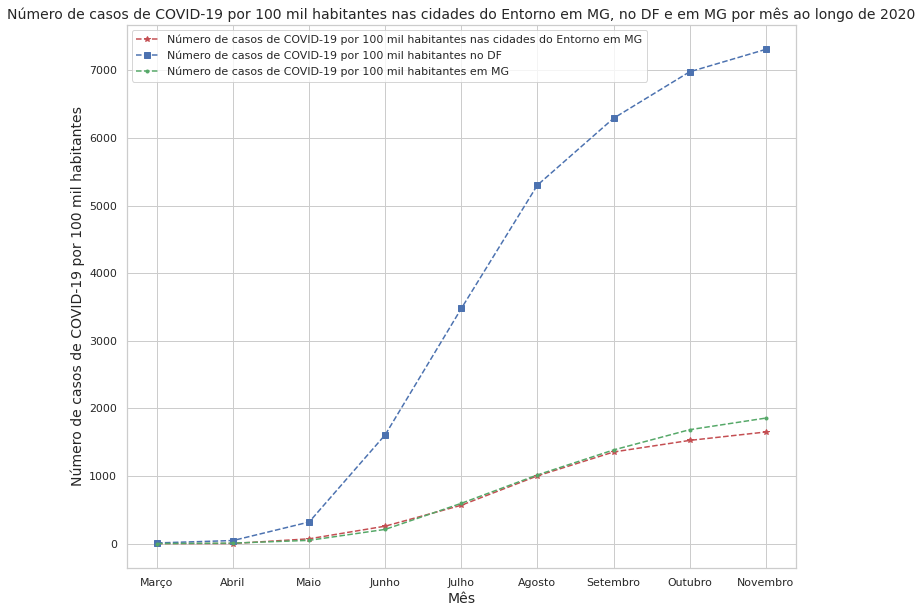

In [68]:
# Agrupando os casos confirmados por data, obtendo a média dos valores (para obter a média dos dados das cidades do Entorno), 
# organizando e resetando o index para gerar um dataframe
#
historico_casos_100k_entorno_MG = historico_entorno_MG.groupby(historico_entorno_MG['date'])['confirmed_per_100k_inhabitants'].mean().sort_values().reset_index()

# Convertendo a data para o formato datetime
#
historico_casos_100k_entorno_MG['date'] = pd.to_datetime(historico_casos_100k_entorno_MG['date'])

# Agrupando novamente por data, para agrupar os dados por mês('%B') usando a função strftime. 
# Os valores são agregados, selecionados e o index é resetado para gerar um dataframe
#
historico_casos_100k_entorno_MG = historico_casos_100k_entorno_MG.groupby(historico_casos_100k_entorno_MG['date'].dt.strftime('%B'))['confirmed_per_100k_inhabitants'].agg('last').sort_values().reset_index()

# Colocando os meses em português nos dataframes criados
#
historico_casos_100k_entorno_MG = historico_casos_100k_entorno_MG.replace({"date": meses})

plt.figure(figsize=(12,10))

plt.plot(historico_casos_100k_entorno_MG['date'], historico_casos_100k_entorno_MG['confirmed_per_100k_inhabitants'], 'r*--', 
         historico_casos_100k_DF['date'], historico_casos_100k_DF['confirmed_per_100k_inhabitants'], 'bs--', 
         historico_casos_100k_MG['date'], historico_casos_100k_MG['confirmed_per_100k_inhabitants'], 'g.--')

plt.legend(('Número de casos de COVID-19 por 100 mil habitantes nas cidades do Entorno em MG',
            'Número de casos de COVID-19 por 100 mil habitantes no DF',
            'Número de casos de COVID-19 por 100 mil habitantes em MG'))

plt.ylabel('Número de casos de COVID-19 por 100 mil habitantes', fontsize=14)
plt.xlabel('Mês', fontsize=14)
plt.title('Número de casos de COVID-19 por 100 mil habitantes nas cidades do Entorno em MG, no DF e em MG por mês ao longo de 2020', fontsize=14)

plt.show()

* As conclusões aqui são basicamente as mesmas para a análise anterior (cidades do Entorno de GO):

* **1) O DF continua tendo o maior número de casos confirmados por 100 mil habitantes**.

* **2) As cidades do Entorno em MG possuem um número de casos por 100 mil habitantes do que o número de casos do estado de MG, mesmo sendo somente 4 cidades do estado**.

* **3) Os dados não mostram uma relação clara entre a região do Entorno em MG e o DF**.

* **4) Entretanto, pela proximidade geográfica e a quantidade de pessoas que frequentam o DF oriundas dessas regiões, é importante sempre analisar a situação da região do Entorno (tanto as cidades de GO e de MG), ainda mais levando em consideração a alta taxa de casos importados/indefinidos de COVID-19 no DF**.

###**9) Conclusão**

* O DF é a região com maior número de casos confirmados por 100 mil habitantes em comparação com Goiás e Minas Gerais.

* Se consideramos o número total e casos confirmados e de mortes, o DF possui números menores que GO e MG, principalmente por conta da sua população, que é menor que a desses estados.

* O DF possui uma alta taxa de casos de COVID-19 importados/indefinidos (aproximadamente 12.3%), o que indica que é importante analisar os dados de regiões mais próximas. Surtos de COVID-19 na região do Entorno, por exemplo, podem indicar em uma incidência maior de casos no DF, por muitas pessoas que moram nessas cidades trabalharem, estudarem e frequentarem o DF.

* Apesar disso, com os dados analisados não foi possível estabelecer uma relação entre os casos do Entorno e do DF. É bem provável que haja sim uma relação, pelo que foi discutido, mas não é possível afirmar isso com base nos dados até aqui apurados.

* Um dos fatos que pode explicar a alta taxa de casos por 100 mil habitantes no DF é a quantidade de testes realizados: o DF é uma das unidades da Federação que mais testa e, consequentemente, sofre menos de subnotificações do que outros estados.

* Ainda assim, as altas taxas de casos por 100 mil somadas à alta taxa de casos importados no DF mostram que é necessário investir em testagem e analisar dados não somente do DF mas de regiões vizinhas, para que se possa tomar decisões de como enfrentar a pandemia do COVID-19 no DF.

* Os dados também mostram que a situação, por mais que tenha melhorados nos últimos meses, ainda não está totalmente sob controle e é preciso consciência e cooperação de todos para que possamos lidar com a pandemia da melhor maneira possível aqui no DF.

###**Referências bibilográficas**

[1] Átila Matias, **RIDE-DF (Região Integrada de Desenvolvimento do Distrito Federal e Entorno)**. Disponível em: https://brasilescola.uol.com.br/brasil/ride.htm , Acesso em: 24 de novembro de 2020.

[2] Brasil.io, **COVID-19 Datasets**, Disponível em: https://brasil.io/dataset/covid19/caso/ , Acesso em: 24 de novembro de 2020.

[3] Álvaro Justen, Enderson Maia, Edgar, Ariel Cavalcante, **API Dataset covid19 no Brasil.IO**, Disponível em: https://github.com/turicas/covid19-br/blob/master/api.md#casos , Acesso em: 24 de novembro de 2020.

[4] Carolina Cruz, **DF tem maior taxa de mortes por milhão de habitantes do país e risco de 2ª onda, aponta estudo**, Disponível em: https://g1.globo.com/df/distrito-federal/noticia/2020/11/24/ , Acesso em: 24 de novembro de 2020.

[5] Rafael Secunho, Carolina Jardon, **Testagem no Distrito Federal é a maior do Brasil**, Disponível em: https://www.agenciabrasilia.df.gov.br/2020/08/21/testagem-no-distrito-federal-e-a-maior-do-brasil/ , Acesso em: 24 de novembro de 2020.